# Lecture 5: Solving Ordinary Differential Equations (ODEs) with Python
Learning Objectives:

Solving ODEs using Python's `scipy.integrate.solve_ivp` function:
1. Simple first-order ODEs
2. Systems of ODEs (converting higher-order ODEs)
3. Passing parameters to ODE functions
4. Physical applications: Harmonic and damped oscillators

In [1]:
# Import necessary libraries
import numpy as np
import scipy.integrate as scint
import matplotlib.pyplot as plt

## Part 1: Solving a Simple First-Order ODE
Consider the differential equation:
$$\frac{dy}{dt} = -2y$$
with initial condition $y(0) = 1$ over the time interval $t \in [0, 4]$.

The analytical solution is $y(t) = e^{-2t}$.

In [2]:
# Define the ODE function
# Note: The order of arguments (t, y) is important for solve_ivp
def dydt(t, y):
    """Defines the right-hand side of the ODE: dy/dt = -2y"""
    return -2.0 * y

In [3]:
# Solve the ODE using solve_ivp
# Arguments: (function, time_span, initial_condition)
result = scint.solve_ivp(dydt, (0, 4), np.array([1.0]))
print(result)
print(f"\nTime points computed: {len(result.t)}")

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  7.580e-02  5.398e-01  9.778e-01  1.418e+00
             1.858e+00  2.299e+00  2.741e+00  3.189e+00  3.647e+00
             4.000e+00]
        y: [[ 1.000e+00  8.593e-01  3.400e-01  1.416e-01  5.880e-02
              2.440e-02  1.011e-02  4.171e-03  1.705e-03  6.823e-04
              3.370e-04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

Time points computed: 11


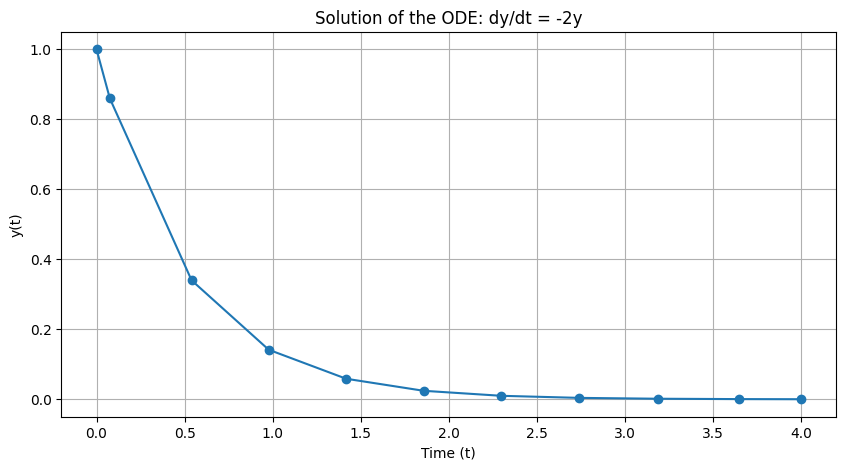

In [4]:
# Plot the initial solution (with default time points)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(result.t, result.y[0], 'o-')
ax.set_title('Solution of the ODE: dy/dt = -2y')
ax.set_xlabel('Time (t)')
ax.set_ylabel('y(t)')
ax.grid(True)
plt.show()

### Improving the Solution with More Time Steps

By default, `solve_ivp` uses only a few time points. To get a smoother plot, we can specify exactly where we want the solution evaluated using the `t_eval` parameter.

In [5]:
# Create 100 evenly spaced time points
t_soln = np.linspace(0, 4, 100)

# Solve again with specific evaluation points
result = scint.solve_ivp(dydt, (0, 4), np.array([1.0]), t_eval=t_soln)
print(f"Time points computed: {len(result.t)}")

Time points computed: 100


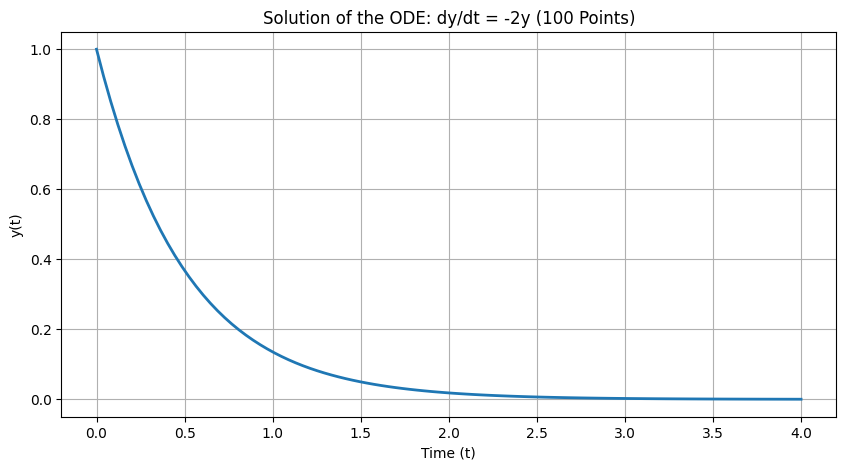

In [6]:
# Plot the improved solution
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(result.t, result.y[0], linewidth=2)
ax.set_title('Solution of the ODE: dy/dt = -2y (100 Points)')
ax.set_xlabel('Time (t)')
ax.set_ylabel('y(t)')
ax.grid(True)
plt.show()

## Part 2: Harmonic Oscillator (Undamped)

Consider a second-order ODE describing a simple harmonic oscillator:

$$\frac{d^2x}{dt^2} = -kx$$

To use `solve_ivp`, we convert this to a system of first-order ODEs by introducing a state vector $\mathbf{y} = [x, v]$ where $v = \frac{dx}{dt}$:

$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = -kx$$

Initial conditions: $x(0) = 1$, $v(0) = 0$

In [7]:
# Define parameters
k = 1.0  # spring constant
x0 = 1.0  # initial position
v0 = 0.0  # initial velocity

# Define the ODE function for the state vector
def ode_function(t, ystate):
    """Returns derivatives of the state vector [x, v]"""
    x, v = ystate  # Unpack the state vector
    dystatedt = [v, -k * x]  # [dx/dt, dv/dt]
    return dystatedt

# Initial conditions as a state vector
ystate0 = [x0, v0]

# Time span and evaluation points
t_span = (0, 10)
t_eval = np.linspace(*t_span, 100)

# Solve the ODE
sol = scint.solve_ivp(ode_function, t_span, ystate0, t_eval=t_eval)
print(f"Solution computed at {len(sol.t)} time points")

Solution computed at 100 time points


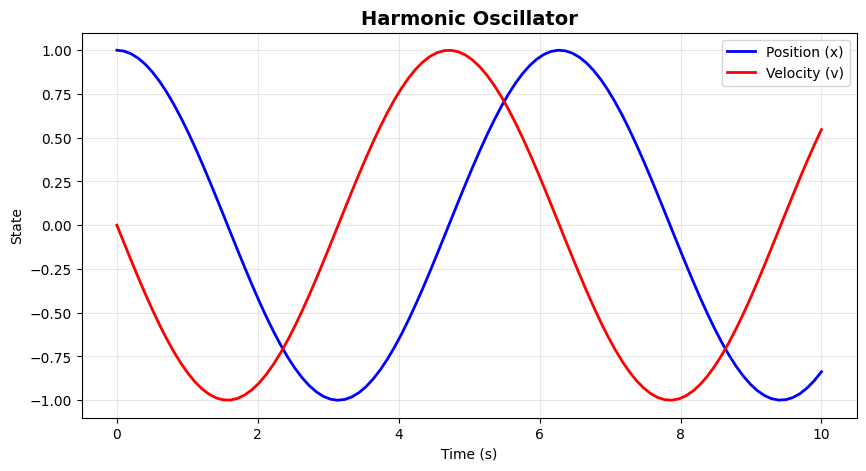

In [8]:
# Plot position and velocity
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Position (x)', color='b', linewidth=2)
plt.plot(sol.t, sol.y[1], label='Velocity (v)', color='r', linewidth=2)
plt.title('Harmonic Oscillator', fontsize=14, fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Part 3: Damped Harmonic Oscillator

A more realistic model includes damping. The equation becomes:

$$\frac{d^2y}{dt^2} + 2\varepsilon\omega_0\frac{dy}{dt} + \omega_0^2 y = 0$$

where:
- $\omega_0 = \sqrt{k/m}$ is the natural frequency
- $\varepsilon = \frac{c}{2m\omega_0}$ is the damping ratio
- $k$ is the spring constant
- $m$ is the mass
- $c$ is the viscous damping coefficient

Converting to a system of first-order ODEs with state vector $[y, y']$:

$$\frac{dy}{dt} = y'$$
$$\frac{dy'}{dt} = -2\varepsilon\omega_0 y' - \omega_0^2 y$$

In [9]:
# Define physical parameters
mass = 0.5  # kg - mass
kspring = 4  # N/m - spring constant
cviscous = 0.4  # N·s/m - viscous damping coefficient

# Compute derived constants
omega = np.sqrt(kspring / mass)  # Natural frequency
eps = cviscous / (2 * mass * omega)  # Damping ratio

print(f"Natural frequency ω₀ = {omega:.3f} rad/s")
print(f"Damping ratio ε = {eps:.3f}")
if eps < 1:
    print("System is underdamped (oscillatory)")
elif eps == 1:
    print("System is critically damped")
else:
    print("System is overdamped")

Natural frequency ω₀ = 2.828 rad/s
Damping ratio ε = 0.141
System is underdamped (oscillatory)


### Passing Parameters to the ODE Function

When the ODE depends on parameters (like $\varepsilon$ and $\omega_0$), we can pass them using the `args` parameter in `solve_ivp`.

In [10]:
# Define the ODE function with parameters
def deriv_ystate(time, ystate, epsilon, omega_spring):
    """Calculates the derivatives of the state vector [y, y']"""
    yprime = ystate[1]  # dy/dt = y'
    y2prime = -2.0 * epsilon * omega_spring * ystate[1] - omega_spring ** 2 * ystate[0]  # dy'/dt
    return (yprime, y2prime)

# Set up the solution
time_soln = np.linspace(0, 10, 100)
ystateinit = (1, 0)  # Initial conditions: y(0) = 1, y'(0) = 0

# Solve the ODE, passing parameters via args
result = scint.solve_ivp(deriv_ystate, (0, 10), ystateinit, 
                         t_eval=time_soln, args=(eps, omega))
print(f"Solution successfully computed with {len(result.t)} points")

Solution successfully computed with 100 points


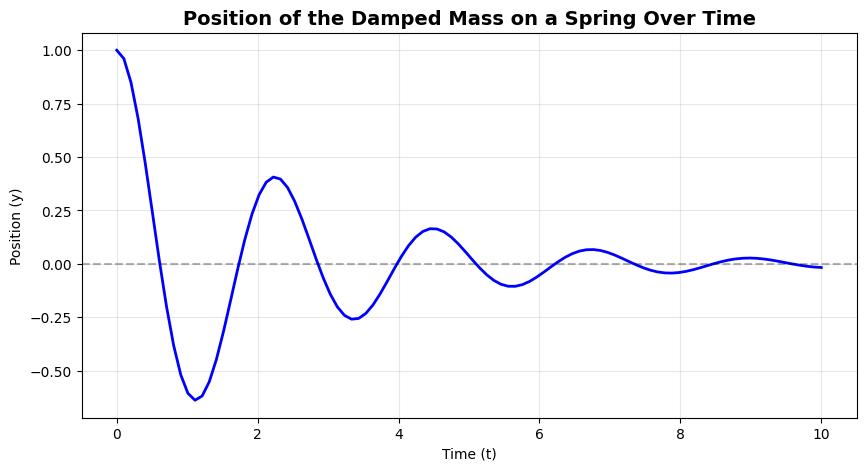

In [11]:
# Plot position over time
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(result.t, result.y[0], linewidth=2, color='blue')
ax.set_title('Position of the Damped Mass on a Spring Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Time (t)')
ax.set_ylabel('Position (y)')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.show()

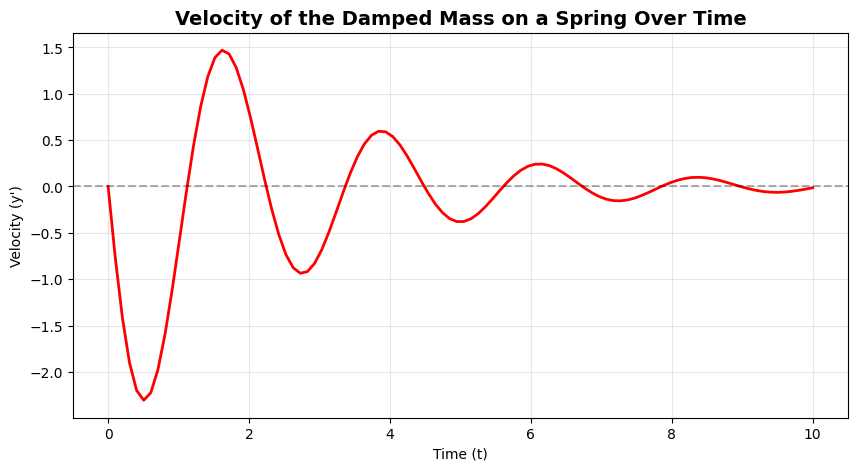

In [12]:
# Plot velocity over time
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(result.t, result.y[1], linewidth=2, color='red')
ax.set_title('Velocity of the Damped Mass on a Spring Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Time (t)')
ax.set_ylabel("Velocity (y')")
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.show()

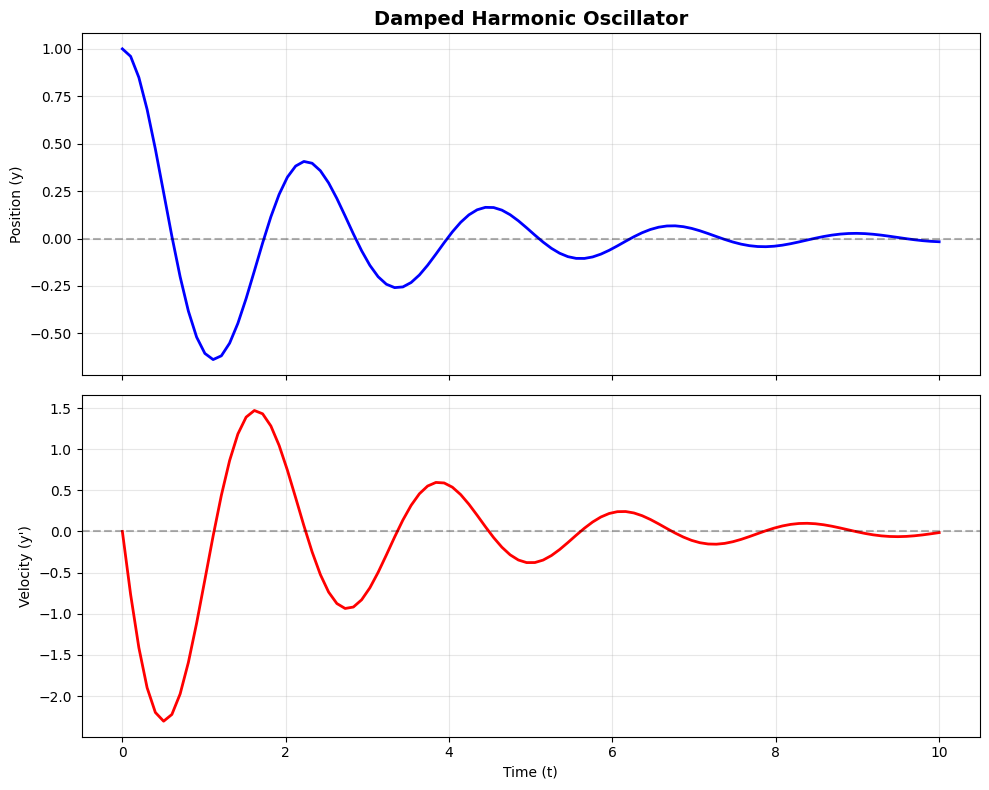

In [13]:
# Combined plot of position and velocity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Position subplot
ax1.plot(result.t, result.y[0], linewidth=2, color='blue')
ax1.set_ylabel('Position (y)')
ax1.set_title('Damped Harmonic Oscillator', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)

# Velocity subplot
ax2.plot(result.t, result.y[1], linewidth=2, color='red')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel("Velocity (y')")
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

### Key Points:

1. **Example `solve_ivp` syntax**: `solve_ivp(function, time_span, initial_condition, t_eval=time_points, args=parameters)` (Look up the manual for other parameters!)

2. **ODE function format**: Must have signature `f(t, y)` where `t` is time and `y` is the state vector

3. **Converting higher-order ODEs**: Convert an $n$-th order ODE to a system of $n$ first-order ODEs using a state vector

4. **Using `t_eval`**: Specify evaluation points for smoother plots and better control over output

5. **Passing parameters**: Use the `args` tuple to pass additional parameters to your ODE function

6. **Accessing results**: 
   - `result.t`: time points
   - `result.y[i]`: solution for the $i$-th component of the state vector
